# OFFERS MATHCED TO INDIVIDUALS

## Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Read in profiles csv to df

In [13]:
df_profiles = pd.read_csv('profiles.csv', names=["sex", "age"])
df_profiles.head()

,sex,age
0,F,51
1,F,28
2,F,29
3,F,27
4,M,48


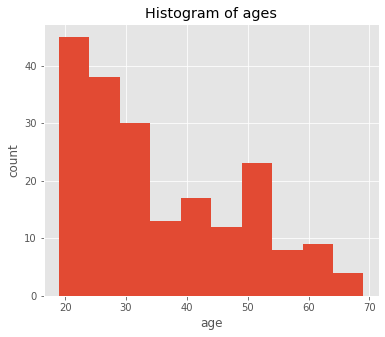

In [14]:
plt.figure(figsize=(6,5))
plt.hist(df_profiles.age)
plt.xlabel("age")
plt.ylabel("count")
plt.title("Histogram of ages")
plt.show();

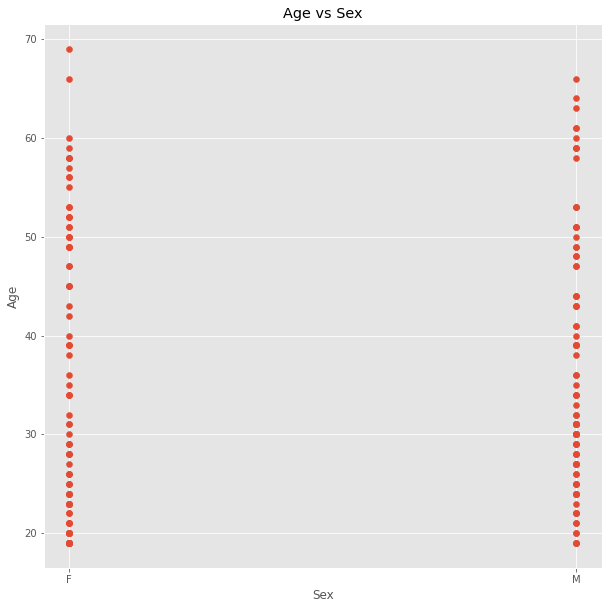

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(df_profiles.sex, df_profiles.age)
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Age vs Sex")
plt.show()

## Read in offers csv to df

In [16]:
df_offers = pd.read_csv('offers.csv')
df_offers

,offer_name,price,show_male,show_female,show_18_25,show_26_35,show_36_45,show_46_plus
0,A,3,True,False,True,False,False,False
1,B,5,True,False,True,True,False,True
2,C,2,False,True,True,False,False,False
3,D,1,True,True,False,True,True,False
4,E,7,True,False,True,False,False,False
5,F,2,True,True,False,True,False,False
6,G,5,False,True,True,False,False,True
7,H,1,True,True,False,True,False,False
8,I,4,True,False,True,True,False,False
9,J,3,False,True,False,False,True,False


## Read in output csv to df

In [17]:
df_output = pd.read_csv('output.csv', names=["sex", "age", "offer_1", "offer_2", "offer_3", "offer_4", "offer_5", "offer_6", "offer_7", "offer_8", "offer_9", "offer_10"])
df_output

,sex,age,offer_1,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9,offer_10
0,F,51,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,28,F,H,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,29,F,H,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M,48,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M,27,B,I,F,H,D,NaN,NaN,NaN,NaN,NaN


## Create Method for assigning offers

In [18]:
def assign_offers(df):

    combined_array = []

    for i in range(len(df)):

        sex = df.iloc[i].sex
        age = df.iloc[i].age

        individual_array = [sex, age]

        match sex:

            case "M":

                match age:
                    case _ if(age >= 18 and age <= 25):
                        individual_array.append("E")
                        individual_array.append("B")
                        individual_array.append("I")
                        individual_array.append("A")

                    case _ if(age >= 26 and age <= 35):
                        individual_array.append("B")
                        individual_array.append("I")
                        individual_array.append("F")
                        individual_array.append("H")
                        individual_array.append("D")

                    case _ if(age >= 36 and age <= 45):
                        individual_array.append("D")

                    case _ if(age >= 46):
                        individual_array.append("B")

            case "F":

                match age:
                    case _ if(age >= 18 and age <= 25):
                        individual_array.append("G")
                        individual_array.append("C")

                    case _ if(age >= 26 and age <= 35):
                        individual_array.append("F")
                        individual_array.append("H")
                        individual_array.append("D")

                    case _ if(age >= 36 and age <= 45):
                        individual_array.append("J")
                        individual_array.append("D")

                    case _ if(age >= 46):
                        individual_array.append("G")

        combined_array.append(individual_array)

    df_result = pd.DataFrame(combined_array)

    return df_result

## Run logic function

In [24]:
df_result = assign_offers(df_profiles)
df_result.head()

,0,1,2,3,4,5,6
0,F,51,G,None,None,None,None
1,F,28,F,H,D,None,None
2,F,29,F,H,D,None,None
3,F,27,F,H,D,None,None
4,M,48,B,None,None,None,None


## Output result to CSV file

In [25]:
df_result.to_csv("result.csv", header=False, index=False)